In [1]:
import pandas as pd
import numpy as np

In [2]:
df_1 = pd.read_csv('data/articles1.csv')
df_1

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."
...,...,...,...,...,...,...,...,...,...,...
49995,53287,73465,"Rex Tillerson Says Climate Change Is Real, but …",Atlantic,Robinson Meyer,2017-01-11,2017.0,1.0,NaN,"As chairman and CEO of ExxonMobil, Rex Tillers..."
49996,53288,73466,The Biggest Intelligence Questions Raised by t...,Atlantic,Amy Zegart,2017-01-11,2017.0,1.0,NaN,I’ve spent nearly 20 years looking at intellig...
49997,53289,73467,Trump Announces Plan That Does Little to Resol...,Atlantic,Jeremy Venook,2017-01-11,2017.0,1.0,NaN,Donald Trump will not be taking necessary st...
49998,53290,73468,Dozens of For-Profit Colleges Could Soon Close,Atlantic,Emily DeRuy,2017-01-11,2017.0,1.0,NaN,Dozens of colleges could be forced to close ...


In [3]:
titles = df_1['title'].array
papers = df_1['content'].array

In [4]:
titles[1]

'Rift Between Officers and Residents as Killings Persist in South Bronx - The New York Times'

In [5]:
papers[1]

'After the bullet shells get counted, the blood dries and the votive candles burn out, people peer down from   windows and see crime scenes gone cold: a band of yellow police tape blowing in the breeze. The South Bronx, just across the Harlem River from Manhattan and once shorthand for urban dysfunction, still suffers violence at levels long ago slashed in many other parts of New York City. And yet the city’s efforts to fight it remain splintered, underfunded and burdened by scandal. In the 40th Precinct, at the southern tip of the Bronx, as in other poor, minority neighborhoods across the country, people long hounded for   infractions are crying out for more protection against grievous injury or death. By September, four of every five shootings in the precinct this year were unsolved. Out of the city’s 77 precincts, the 40th has the highest murder rate but the fewest detectives per violent crime, reflecting disparities in staffing that hit hardest in some neighborhoods outside Manhatt

We perform some basic text wrangling or preprocessing before diving into topic modeling. We keep things simple here and perform tokenization, lemmatizing nouns, and removing stopwords and any terms having a single character.


In [6]:
%%time
import nltk

stop_words = nltk.corpus.stopwords.words('english')
wtk = nltk.tokenize.RegexpTokenizer(r'\w+')
wnl = nltk.stem.wordnet.WordNetLemmatizer()

def normalise_corpus(papers, titles):
    norm_papers = []
    pre_papers = []
    pre_titles = []
    for i in range(len(papers)):
        paper = papers[i]
        title = titles[i]

        paper = paper.lower()
        paper_tokens = [token.strip() for token in wtk.tokenize(paper)]
        paper_tokens = [wnl.lemmatize(token) for token in paper_tokens if not token.isnumeric()]
        paper_tokens = [token for token in paper_tokens if len(token) > 1]
        paper_tokens = [token for token in paper_tokens if token not in stop_words]
        paper_tokens = list(filter(None, paper_tokens))

        if paper_tokens:
            norm_papers.append(paper_tokens)
            pre_papers.append(paper)
            pre_titles.append(title)

    return norm_papers, pre_papers, pre_titles


def normalize_corpus(papers):
    norm_papers = []
    for paper in papers:
        paper = paper.lower()
        paper_tokens = [token.strip() for token in wtk.tokenize(paper)]
        paper_tokens = [wnl.lemmatize(token) for token in paper_tokens if not token.isnumeric()]
        paper_tokens = [token for token in paper_tokens if len(token) > 1]
        paper_tokens = [token for token in paper_tokens if token not in stop_words]
        paper_tokens = list(filter(None, paper_tokens))
        if paper_tokens:
            norm_papers.append(paper_tokens)
    return norm_papers


# norm_papers = normalize_corpus(papers)

norm_papers, pre_papers, pre_titles = normalise_corpus(papers, titles)

print(len(norm_papers))

49933
CPU times: user 2min 23s, sys: 957 ms, total: 2min 24s
Wall time: 2min 23s


In [9]:
len(pre_papers), len(pre_titles)

(49933, 49933)

### topic modelling with gensim

In [10]:
import gensim

# higher threshold fewer phrases
bigram = gensim.models.Phrases(norm_papers, min_count=20, threshold=20, delimiter=b'_')

bigram_model = gensim.models.phrases.Phraser(bigram)

# sample demonstration
print(bigram_model[norm_papers[0]][:50])

['washington', 'congressional', 'republican', 'new', 'fear', 'come', 'health_care', 'lawsuit', 'obama_administration', 'might', 'win', 'incoming', 'trump', 'administration', 'could', 'choose', 'longer', 'defend', 'executive_branch', 'suit', 'challenge', 'administration', 'authority', 'spend', 'billion_dollar', 'health_insurance', 'subsidy', 'american', 'handing', 'house', 'republican', 'big', 'victory', 'issue', 'sudden', 'loss', 'disputed', 'subsidy', 'could_conceivably', 'cause', 'health_care', 'program', 'implode', 'leaving', 'million', 'people', 'without', 'access', 'health_insurance', 'republican']


In [11]:
norm_corpus_bigrams = [bigram_model[doc] for doc in norm_papers]

# Create a dictionary representation of the documents.
dictionary = gensim.corpora.Dictionary(norm_corpus_bigrams)

print('Sample word to number mappings:', list(dictionary.items())[:15])
print('\n Total Vocabulary Size:', len(dictionary))

Sample word to number mappings: [(0, 'access'), (1, 'acknowledge'), (2, 'act'), (3, 'administration'), (4, 'advocate'), (5, 'affordable_care'), (6, 'ally'), (7, 'american'), (8, 'angering'), (9, 'annual'), (10, 'another'), (11, 'anticipated'), (12, 'anticipating'), (13, 'appeal'), (14, 'appealed')]

 Total Vocabulary Size: 170226


In [12]:
# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.6)
print('Total Vocabulary Size:', len(dictionary))

Total Vocabulary Size: 33588


In [13]:
# Transforming corpus into bag of words vectors
bow_corpus = [dictionary.doc2bow(text) for text in norm_corpus_bigrams]
print(bow_corpus[1][:50])

[(0, 1), (4, 1), (6, 1), (10, 3), (21, 2), (31, 18), (32, 1), (34, 1), (39, 4), (40, 1), (45, 1), (57, 5), (59, 2), (64, 1), (66, 1), (68, 1), (81, 1), (84, 1), (85, 3), (88, 2), (90, 2), (93, 3), (97, 2), (99, 3), (100, 3), (102, 1), (109, 1), (110, 1), (112, 3), (116, 9), (124, 1), (136, 1), (138, 1), (140, 2), (141, 6), (142, 2), (143, 1), (148, 1), (157, 4), (159, 2), (160, 2), (162, 2), (163, 4), (165, 22), (167, 3), (168, 4), (171, 4), (177, 4), (180, 1), (181, 1)]


In [14]:
# viewing actual terms and their counts
print([(dictionary[idx] , freq) for idx, freq in bow_corpus[1][:50]])

[('access', 1), ('advocate', 1), ('ally', 1), ('another', 3), ('authority', 2), ('case', 18), ('cause', 1), ('challenge', 1), ('come', 4), ('comment', 1), ('confident', 1), ('could', 5), ('court', 2), ('decision', 1), ('defend', 1), ('desperate', 1), ('drop', 1), ('effect', 1), ('effort', 3), ('end', 2), ('era', 2), ('even_though', 3), ('fear', 2), ('fight', 3), ('find', 3), ('found', 1), ('given', 1), ('government', 1), ('handle', 3), ('house', 9), ('inclined', 1), ('judge', 1), ('lack', 1), ('late', 2), ('later', 6), ('law', 2), ('lawsuit', 1), ('leaving', 1), ('many', 4), ('may', 2), ('might', 2), ('money', 2), ('month', 4), ('mr', 22), ('never', 3), ('new', 4), ('office', 4), ('part', 4), ('paying', 1), ('payment', 1)]


### save dictionary, norm_corpus_bigrams, pre_titles, pre_papers, etc

In [72]:
import pickle  

In [84]:
with open("lists/norm_corpus_bigrams.txt", "wb") as fp:
    pickle.dump(norm_corpus_bigrams, fp)  

with open("lists/pre_titles.txt", "wb") as fp:
    pickle.dump(pre_titles, fp)    
    
with open("lists/pre_papers.txt", "wb") as fp:
    pickle.dump(pre_papers, fp)    
    
with open("lists/bow_corpus.txt", "wb") as fp:
    pickle.dump(bow_corpus, fp)  

with open("lists/norm_papers.txt", "wb") as fp:
    pickle.dump(norm_papers, fp)  

In [69]:
dictionary.save('models/dictionary.gensim')

### LDA TUNING; FINDING THE OPTIMAL NUMBER OF TOPICS

Finding the optimal number of topics in a topic model is tough, given that it is like a model hyperparameter that you always have to set before training the model. We can use an iterative approach and build several models with differing numbers of topics and select the one that has the highest coherence score. To implement this method, we build the following function.

In [15]:
from tqdm import tqdm
def topic_model_coherence_generator(corpus, texts, dictionary,
                          start_topic_count=2, end_topic_count=10, step=1,
                                    cpus=1):
    models = []
    coherence_scores = []
    for topic_nums in tqdm(range(start_topic_count, end_topic_count+1, step)):
        gensim_lda_model = gensim.models.LdaModel(
                                              corpus=corpus,
                                              num_topics=topic_nums,
                                              id2word=dictionary,
                                              chunksize=1740,
                                              iterations=500,
                                              alpha="auto",
                                              eta="auto",
                                              passes=20
                                                )

        cv_coherence_model_gensim_lda = gensim.models.CoherenceModel(model=gensim_lda_model,
                                                    corpus=corpus,
                                                    texts=texts,
                                                    dictionary=dictionary,
                                                    coherence='c_v')

        coherence_score = cv_coherence_model_gensim_lda.get_coherence()
        coherence_scores.append(coherence_score)
        models.append(gensim_lda_model)
        
        ### saving each model
        gensim_lda_model.save('models/gensim/model_'+str(topic_nums)+'.gensim')

    return models, coherence_scores

In [16]:
lda_models, coherence_scores = topic_model_coherence_generator(corpus=bow_corpus,
                                                texts=norm_corpus_bigrams,
                                                dictionary=dictionary,
                                                start_topic_count=2,
                                                end_topic_count=30, step=1,
                                                cpus=16)

100%|██████████| 29/29 [10:56:14<00:00, 1357.75s/it] 


In [17]:
coherence_df = pd.DataFrame({'Number of Topics': range(2, 31, 1),
                        'Coherence Score': np.round(coherence_scores, 4)})
coherence_df.sort_values(by=['Coherence Score'], ascending=False).head(10)

,Number of Topics,Coherence Score
27,29,0.5502
26,28,0.5410
21,23,0.5335
23,25,0.5251
28,30,0.5222
17,19,0.5207
15,17,0.5203
24,26,0.5192
22,24,0.5140
19,21,0.5106


### save coherence scores and visualize 

In [93]:
coherence_df.to_csv('models/gensim_scores/coherence_df.csv', index=False)

In [94]:
with open("models/gensim_scores/coherence_scores.txt", "wb") as fp:   #Pickling
    pickle.dump(coherence_scores, fp)

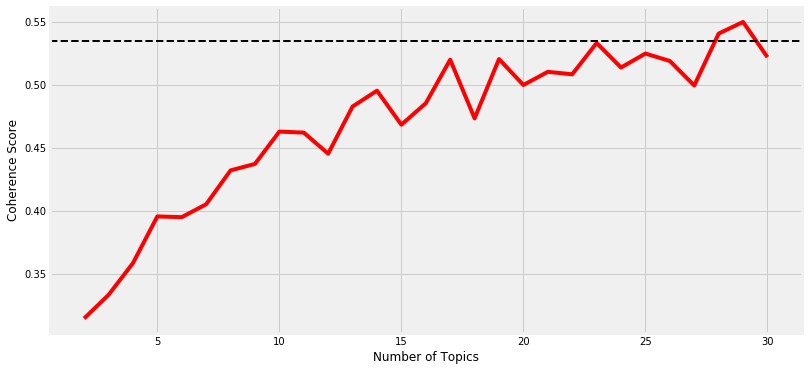

In [18]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline
x_ax = range(2, 31, 1)
y_ax = coherence_scores
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c="r")
plt.axhline(y=0.535, c="k", linestyle="--", linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'
xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score')

### selecting best model based on coherence

In [20]:
best_model_idx = coherence_df[coherence_df['Number of Topics'] == 25].index[0]
best_lda_model = lda_models[best_model_idx]
best_lda_model.num_topics

25

### saving all models

In [52]:
### saving all models
for i in range(len(lda_models)):
    lda_models[i].save('models/gensim/model_'+
                       str(coherence_df['Number of Topics'].iloc[i])+
                       '.gensim')

### saving or loading best model

In [45]:
best_lda_model.save('models/gensim/best_model'+str(best_lda_model.num_topics)+'.gensim')

# best_lda_model = gensim.models.ldamodel.LdaModel.load('models/gensim/best_model_25.gensim')

### checking topics

In [21]:
topics = [[(term, round(wt, 3))
               for term, wt in best_lda_model.show_topic(n, topn=20)]
                   for n in range(0, best_lda_model.num_topics)]
for idx, topic in enumerate(topics):
    print('Topic #'+str(idx+1)+':')
    print([term for term, wt in topic])
    print()

Topic #1:
['people', 'even', 'american', 'many', 'right', 'would', 'world', 'political', 'america', 'like', 'way', 'country', 'also', 'issue', 'power', 'time', 'new', 'make', 'fact', 'history']

Topic #2:
['isi', 'military', 'syria', 'russia', 'government', 'iran', 'country', 'force', 'war', 'russian', 'group', 'united_state', 'turkey', 'iraq', 'also', 'putin', 'syrian', 'official', 'leader', 'obama']

Topic #3:
['book', 'cuban', 'abortion', 'cuba', 'king', 'life', 'castro', 'india', 'lewis', 'lee', 'indian', 'canada', 'death', 'canadian', 'woman', 'planned_parenthood', 'jackson', 'hurricane', 'baby', 'american']

Topic #4:
['official', 'investigation', 'email', 'would', 'russia', 'president', 'fbi', 'russian', 'report', 'information', 'white_house', 'former', 'government', 'told_cnn', 'committee', 'intelligence', 'administration', 'comey', 'also', 'statement']

Topic #5:
['company', 'business', 'million', 'apple', 'tesla', 'new', 'year', 'market', 'also', 'product', 'google', 'sale', 

A better way of visualizing the topics is to build a term-topic dataframe.

In [22]:
topics_df = pd.DataFrame([[term for term, wt in topic]
                              for topic in topics],
                         columns = ['Term'+str(i) for i in range(1, 21)],
                         index=['Topic '+str(t) for t in range(1, best_lda_model.num_topics+1)]).T
topics_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,...,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25
Term1,people,isi,book,official,company,trump,facebook,attack,car,game,...,student,march,woman,family,police,europe,year,film,republican,city
Term2,even,military,cuban,investigation,business,clinton,news,muslim,water,team,...,school,day,black,child,officer,party,new_york,show,state,police
Term3,american,syria,abortion,email,million,president,twitter,people,could,first,...,university,california,white,life,case,britain,work,movie,vote,people
Term4,many,russia,cuba,would,apple,donald_trump,video,killed,space,player,...,college,july,men,father,court,european,time,star,democrat,protest
Term5,right,government,king,russia,tesla,campaign,medium,isi,area,sport,...,state,june,female,mother,gun,country,first,actor,party,street
Term6,would,iran,life,president,new,obama,story,terrorist,plane,win,...,education,april,music,home,two,france,mr,character,voter,protester
Term7,world,country,castro,fbi,year,hillary_clinton,show,airline,fire,season,...,campus,cnn,song,son,according,british,city,eu,election,israel
Term8,political,force,india,russian,market,white_house,cnn,security,flight,two,...,teacher,may,sex,told,prison,germany,new,hollywood,would,official
Term9,america,war,lewis,report,also,election,time,airport,cnn,year,...,kasich,time,also,parent,authority,french,home,series,candidate,area
Term10,like,russian,lee,information,product,former,social_medium,terrorism,storm,final,...,program,september,gay,day,man,london,building,best,cruz,local


Another easy way to view the topics is to create a topic-term dataframe, whereby each topic is represented in a row with the terms of the topic being represented as a comma-separated string.

In [23]:
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic])
                              for topic in topics],
                         columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, best_lda_model.num_topics+1)]
                         )
topics_df

,Terms per Topic
Topic1,"people, even, american, many, right, would, world, political, america, like, way, country, also, issue, power, time, new, make, fact, history"
Topic2,"isi, military, syria, russia, government, iran, country, force, war, russian, group, united_state, turkey, iraq, also, putin, syrian, official, leader, obama"
Topic3,"book, cuban, abortion, cuba, king, life, castro, india, lewis, lee, indian, canada, death, canadian, woman, planned_parenthood, jackson, hurricane, baby, american"
Topic4,"official, investigation, email, would, russia, president, fbi, russian, report, information, white_house, former, government, told_cnn, committee, intelligence, administration, comey, also, statement"
Topic5,"company, business, million, apple, tesla, new, year, market, also, product, google, sale, investor, billion, money, customer, according, employee, car, technology"
Topic6,"trump, clinton, president, donald_trump, campaign, obama, hillary_clinton, white_house, election, former, mr, speech, also, candidate, say, first, would, american, country, day"
Topic7,"facebook, news, twitter, video, medium, story, show, cnn, time, social_medium, post, tweet, user, online, also, report, website, network, ad, site"
Topic8,"attack, muslim, people, killed, isi, terrorist, airline, security, airport, terrorism, two, bomb, attacker, bombing, according, pakistan, group, paris, threat, terrorist_attack"
Topic9,"car, water, could, space, area, plane, fire, flight, cnn, storm, vehicle, home, foot, air, hour, first, system, passenger, driver, road"
Topic10,"game, team, first, player, sport, win, season, two, year, final, second, play, time, world, three, fan, point, football, ball, back"


### Interpreting results

In [24]:
tm_results = best_lda_model[bow_corpus]

In [25]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0]
                     for topics in tm_results]
corpus_topics[:5]

[(13, 0.29704174),
 (19, 0.39641228),
 (21, 0.40184233),
 (21, 0.2049382),
 (12, 0.6870948)]

In [26]:
corpus_topic_df = pd.DataFrame()
corpus_topic_df['Document'] = range(0, len(pre_papers))
corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df['Topic Desc'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]
corpus_topic_df['Title'] = pre_titles
corpus_topic_df['Paper'] = pre_papers

In [27]:
pd.set_option('display.max_colwidth', 200)

topic_stats_df = corpus_topic_df.groupby('Dominant Topic').agg({
                                                'Dominant Topic': {
                                                    'Doc Count': np.size,
                                                    '% Total Docs': np.size }
                                              })
topic_stats_df = topic_stats_df['Dominant Topic'].reset_index()
topic_stats_df['% Total Docs'] = topic_stats_df['% Total Docs'].apply(lambda row: round((row*100) / len(pre_papers), 2))
topic_stats_df['Topic Desc'] = [topics_df.iloc[t]['Terms per Topic'] for t in range(len(topic_stats_df))]
topic_stats_df

/Users/alex.nim@ibm.com/opt/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


,Dominant Topic,Doc Count,% Total Docs,Topic Desc
0,1,7469,14.94,"people, even, american, many, right, would, world, political, america, like, way, country, also, issue, power, time, new, make, fact, history"
1,2,2148,4.30,"isi, military, syria, russia, government, iran, country, force, war, russian, group, united_state, turkey, iraq, also, putin, syrian, official, leader, obama"
2,3,61,0.12,"book, cuban, abortion, cuba, king, life, castro, india, lewis, lee, indian, canada, death, canadian, woman, planned_parenthood, jackson, hurricane, baby, american"
3,4,3509,7.02,"official, investigation, email, would, russia, president, fbi, russian, report, information, white_house, former, government, told_cnn, committee, intelligence, administration, comey, also, statement"
4,5,2270,4.54,"company, business, million, apple, tesla, new, year, market, also, product, google, sale, investor, billion, money, customer, according, employee, car, technology"
5,6,4697,9.39,"trump, clinton, president, donald_trump, campaign, obama, hillary_clinton, white_house, election, former, mr, speech, also, candidate, say, first, would, american, country, day"
6,7,1133,2.27,"facebook, news, twitter, video, medium, story, show, cnn, time, social_medium, post, tweet, user, online, also, report, website, network, ad, site"
7,8,475,0.95,"attack, muslim, people, killed, isi, terrorist, airline, security, airport, terrorism, two, bomb, attacker, bombing, according, pakistan, group, paris, threat, terrorist_attack"
8,9,1263,2.53,"car, water, could, space, area, plane, fire, flight, cnn, storm, vehicle, home, foot, air, hour, first, system, passenger, driver, road"
9,10,1708,3.42,"game, team, first, player, sport, win, season, two, year, final, second, play, time, world, three, fan, point, football, ball, back"


### Document's most dominant topic with highest contribution %

In [28]:
corpus_topic_df.sort_values(by='Contribution %', ascending=False)

,Document,Dominant Topic,Contribution %,Topic Desc,Title,Paper
35294,35294,4,95.46,"official, investigation, email, would, russia, president, fbi, russian, report, information, white_house, former, government, told_cnn, committee, intelligence, administration, comey, also, statement","Blumenthal: If Sessions had 3rd, undisclosed Russian meeting, ’could be perjury’","washington (cnn) sen. richard blumenthal said thursday that if attorney general jeff sessions did have a third, undisclosed meeting with russia’s ambassador to the united states, it ”could be perj..."
167,167,23,92.70,"film, show, movie, star, actor, character, eu, hollywood, series, best, season, tv, award, episode, role, producer, director, television, audience, netflix",Golden Globe Award Winners 2017: The Complete List - The New York Times,"here are the movies and tv shows that received the top awards. best picture, drama: “moonlight” best picture, comedy or musical: “la la land” actress, drama: isabelle huppert, “elle” actor, drama:..."
30042,30042,4,92.09,"official, investigation, email, would, russia, president, fbi, russian, report, information, white_house, former, government, told_cnn, committee, intelligence, administration, comey, also, statement",Report: Concerned State Dept Employees Told to ’Never Speak of’ Hillary’s Server - Breitbart,"two it department employees of hillary clinton’s state department were told not to talk about her private email server when both workers noticed it and raised concerns, according to an official of..."
29972,29972,24,91.98,"republican, state, vote, democrat, party, voter, election, would, candidate, cruz, support, poll, senate, bill, gop, conservative, house, sander, democratic, rubio",Ted Cruz Dominates Wyoming Caucus - Breitbart,"on saturday, wyoming republicans voted in county caucuses to elect delegates to the republican convention. texas sen. ted cruz dominated the vote, winning 66 percent support. [florida sen. marco r..."
30205,30205,4,91.94,"official, investigation, email, would, russia, president, fbi, russian, report, information, white_house, former, government, told_cnn, committee, intelligence, administration, comey, also, statement",FBI Reopening Investigation into Hillary Clinton’s Private E-mail Server - Breitbart,"the federal bureau of investigations will reopen the investigation into hillary clinton’s use of a private email server exclusively during her time as secretary of state. in a letter to congress,..."
...,...,...,...,...,...,...
4399,4399,2,10.25,"isi, military, syria, russia, government, iran, country, force, war, russian, group, united_state, turkey, iraq, also, putin, syrian, official, leader, obama","Duterte, Mosul, Calais Jungle: Your Thursday Briefing - The New York Times",good morning. we’re trying something new for our readers in asia and australia: a morning briefing to your day. what do you like? what do you want to see here? email us with your feedback at a...
1063,1063,15,9.78,"say, people, like, get, think, going, know, would, thing, want, time, way, go, really, see, lot, make, back, could, look","Donald Trump, North Korea, Kashmir: Your Morning Briefing - The New York Times",good morning. here’s what you need to know: • president trump’s foreign policy was tested over a weekend of golf diplomacy with prime minister shinzo abe of japan when north korea launched a ball...
1168,1168,13,9.47,"china, north_korea, chinese, country, official, japan, sea, international, nuclear, military, would, missile, island, united_state, two, aircraft, un, philippine, according, ship","Samsung, Kim Jong-un, Rex Tillerson: Your Morning Briefing - The New York Times","good morning. here’s what you need to know: • a south korean court announced the arrest of the de facto leader of samsung, lee on bribery accusations connected to the corruption scandal that ha..."
4952,4952,13,8.98,"china, north_korea, chinese, country, official, japan, sea, international, nuclear, military, would, missile, island, unit

### Dominant Topics in Specific Papers
Another interesting perspective is to select specific papers, view the most dominant topic in each of those papers, and see if that makes sense.

In [29]:
pd.set_option('display.max_colwidth', 200)
(corpus_topic_df[corpus_topic_df['Document']
                 .isin([681, 9, 392, 1622, 17,
                        906, 996, 503, 13, 733])])

,Document,Dominant Topic,Contribution %,Topic Desc,Title,Paper
9,9,19,36.17,"family, child, life, father, mother, home, son, told, parent, day, church, friend, death, daughter, girl, died, two, wife, boy, brother",Calling on Angels While Enduring the Trials of Job - The New York Times,"angels are everywhere in the muñiz family’s apartment in the bronx: paintings of angels on the wall, ceramic angels flanking the ancient vcr, angels strumming lyres or blowing little golden trumpe..."
13,13,15,48.37,"say, people, like, get, think, going, know, would, thing, want, time, way, go, really, see, lot, make, back, could, look",How to form healthy habits in your 20s - The New York Times,this article is part of a series aimed at helping you navigate life’s opportunities and challenges. what else should we write about? contact us: smarterliving@nytimes. com. when you woke up this m...
17,17,14,27.69,"would, year, american, plan, job, economy, policy, percent, cost, government, tax, new, million, people, could, also, worker, trade, economic, program","Modi’s Cash Ban Brings Pain, but Corruption-Weary India Grits Its Teeth - The New York Times","mumbai, india — it was a bold and risky gamble by prime minister narendra modi of india that quickly seemed to backfire. the announcement of a ban on the largest currency bills circulating in i..."
392,392,14,31.81,"would, year, american, plan, job, economy, policy, percent, cost, government, tax, new, million, people, could, also, worker, trade, economic, program","By Announcing New Jobs, Corporations Help Themselves Too - The New York Times","donald j. trump won’t be sworn in until friday but big business has already thrown him a veritable inaugural ball. a series of companies, among them ford, lockheed martin, amazon and sprint, hav..."
503,503,24,38.37,"republican, state, vote, democrat, party, voter, election, would, candidate, cruz, support, poll, senate, bill, gop, conservative, house, sander, democratic, rubio",G.O.P. Senators Hope to Speed Trump Cabinet Confirmations - The New York Times,"washington — senate republicans will move this week to speed the confirmation of president trump’s cabinet, an effort that has been stymied by the combination of lax preparation by mr. trump’s ..."
681,681,14,18.94,"would, year, american, plan, job, economy, policy, percent, cost, government, tax, new, million, people, could, also, worker, trade, economic, program",Duterte’s Free Birth-Control Order Is Latest Skirmish With Catholic Church - The New York Times,"manila — when lizel torreras, 35, became pregnant with her third child, she mixed a tincture of bitter herbs and mahogany bark, a home remedy said to induce abortion. her husband, who worked as..."
733,733,1,25.61,"people, even, american, many, right, would, world, political, america, like, way, country, also, issue, power, time, new, make, fact, history",Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times,"paris — france chose an idealistic, traditional candidate in sunday’s primary to represent the socialist and parties in the presidential election this spring. the candidate, benoît hamon, 4..."
906,906,2,30.81,"isi, military, syria, russia, government, iran, country, force, war, russian, group, united_state, turkey, iraq, also, putin, syrian, official, leader, obama",Cyprus Fears Russian Meddling in Its Settlement Talks - The New York Times,"nicosia, cyprus — as the united nations geared up for negotiations that it declared the “best and last chance” to unite cyprus after more than four decades of acrimonious division, russia’s amb..."
996,996,7,24.80,"facebook, news, twitter, video, medium, story, show, cnn, time, social_medium, post, tweet, user, online, also, report, website, network, ad, site",Mother Jones Is Named Magazine of the Year - The New York Times,"mother jones was named magazine of the year on tuesday for finding “new ways to engage audiences and continue its practice of fearless journalism,” the s

Papers on reinforcement learning, signal processing, gaussian mixture models, processor simulations, word recognitions, and many more have corresponding relevant topics as the most dominant topics. This tells us that our topic model is working well.

### Relevant Research Papers per Topic Based on Dominance
A better way of representation is to try to retrieve the corresponding research paper that has the highest representation for each of the 20 topics.

In [30]:
corpus_topic_df.groupby('Dominant Topic').apply(lambda topic_set:
                                            (topic_set.sort_values(by=['Contribution %'],
                                                   ascending=False).iloc[0]))

,Document,Dominant Topic,Contribution %,Topic Desc,Title,Paper
Dominant Topic,,,,,,
1,43831,1,81.62,"people, even, american, many, right, would, world, political, america, like, way, country, also, issue, power, time, new, make, fact, history",We visited convenience store rivals Wawa and Sheetz to see who does it best — and the winner is clear,"’the capulets versus the montagues. ’ ’harvard versus yale.’ ’britney versus christina.’ ”among history’s fabled rivalries, perhaps none is more fiercely contested than wawa versus sheetz.”"
2,154,2,85.00,"isi, military, syria, russia, government, iran, country, force, war, russian, group, united_state, turkey, iraq, also, putin, syrian, official, leader, obama",Airstrikes by Russia Buttress Turkey in Battle vs. ISIS - The New York Times,"washington — russian warplanes have carried out airstrikes to support turkey’s offensive in northern syria against the islamic state, an important evolution in a budding partnership. the deep..."
3,49376,3,43.01,"book, cuban, abortion, cuba, king, life, castro, india, lewis, lee, indian, canada, death, canadian, woman, planned_parenthood, jackson, hurricane, baby, american",Justin Trudeau walks back his comments on Fidel Castro after getting slammed for praising the dictator,’ ’ ’ canadian prime minister justin trudeau clarified his comments on the death of cuban president fidel castro after being harshly criticized for them. ’ ’ trudeau said at a news confer...
4,35294,4,95.46,"official, investigation, email, would, russia, president, fbi, russian, report, information, white_house, former, government, told_cnn, committee, intelligence, administration, comey, also, statement","Blumenthal: If Sessions had 3rd, undisclosed Russian meeting, ’could be perjury’","washington (cnn) sen. richard blumenthal said thursday that if attorney general jeff sessions did have a third, undisclosed meeting with russia’s ambassador to the united states, it ”could be perj..."
5,46714,5,84.78,"company, business, million, apple, tesla, new, year, market, also, product, google, sale, investor, billion, money, customer, according, employee, car, technology","Yahoo CEO Marissa Mayer got a $6 million pay cut last year, but still got $36 million","’’ ”yahoo ceo marissa mayer’s total compensation was worth $36 million last year, down $6 million, or 15% from the year before, according .” ”most of the cuts came from her option awards, which we..."
6,43799,6,74.97,"trump, clinton, president, donald_trump, campaign, obama, hillary_clinton, white_house, election, former, mr, speech, also, candidate, say, first, would, american, country, day",Bernie Sanders taunts Trump with photos of inauguration crowd after Trump says a rally of his voters would be the ’biggest’,’ sen. bernie sanders responded to president donald trump’’s claim that a rally with his voters would be the ”biggest ever” with photos of his inauguration crowd. ’ ’ trump suggesting tha...
7,18868,7,63.56,"facebook, news, twitter, video, medium, story, show, cnn, time, social_medium, post, tweet, user, online, also, report, website, network, ad, site",WATCH: Why Congress Must Censure Obama for His Hiroshima Speech - Breitbart,"the latest video from breitbart news regarding obama’s apology tour in japan.[ for more on this topic, read this article by joel pollak. for more videos from breitbart news, visit our facebook po..."
8,944,8,60.45,"attack, muslim, people, killed, isi, terrorist, airline, security, airport, terrorism, two, bomb, attacker, bombing, according, pakistan, group, paris, threat, terrorist_attack",Our Articles on the Attacks Trump Says the Media Didn’t Cover - The New York Times,"the white house has issued a list of 78 terrorist attacks, saying most were underreported. the trump administration, under fire for immigration restrictions and other policies it says are designed..."
9,44647,9,76.85,"car, water, could, space, area, plane, fire, flight, cnn, storm, vehicle, home, foot, air, hour, first, system, passen

Based on the paper titles and the corresponding topics depicted, they do make sense. It looks like our model has captured the relevant latent patterns and themes in our corpus.

### Loading model

In [60]:
load_lda_model = gensim.models.ldamodel.LdaModel.load('models/gensim/model_30.gensim')

In [61]:
load_lda_model

In [62]:
topics = [[(term, round(wt, 3))
               for term, wt in load_lda_model.show_topic(n, topn=20)]
                   for n in range(0, load_lda_model.num_topics)]

pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic])
                              for topic in topics],
                         columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, load_lda_model.num_topics+1)]
                         )
topics_df

,Terms per Topic
Topic1,"study, may, found, also, research, could, case, use, data, result, researcher, test, likely, new, system, risk, human, expert, used, according"
Topic2,"percent, year, bill, number, would, plan, american, million, rate, people, increase, according, house, state, cost, price, obamacare, health_care, since, report"
Topic3,"american, world, even, many, time, political, book, history, year, new, power, america, like, much, way, often, idea, might, yet, become"
Topic4,"china, russia, country, iran, russian, north_korea, united_state, putin, chinese, would, official, international, military, government, deal, japan, ally, missile, world, also"
Topic5,"game, team, player, first, win, season, sport, two, final, play, second, time, year, three, point, ball, fan, football, week, back"
Topic6,"trump, president, obama, donald_trump, white_house, former, would, mr, also, campaign, administration, first, day, meeting, office, time, american, leader, comment, washington"
Topic7,"business, company, million, money, tesla, job, market, year, would, economy, billion, government, bank, tax, trade, deal, worker, financial, fund, economic"
Topic8,"hernandez, brazil, rio, gold, athlete, venezuela, lee, olympic, corruption, olympics, brazilian, drug, former, charge, official, fifa, prison, world_cup, year, colombia"
Topic9,"woman, men, girl, female, sex, marriage, gay, male, young, sexual, also, transgender, gender, rape, man, sexual_assault, lgbt, bathroom, boy, body"
Topic10,"company, apple, google, facebook, new, product, customer, employee, business, sale, also, store, uber, user, service, like, according, amazon, technology, year"


In [63]:
tm_results = load_lda_model[bow_corpus]

In [64]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0]
                     for topics in tm_results]
corpus_topics[:5]

[(11, 0.4238178),
 (10, 0.45231712),
 (27, 0.1832193),
 (27, 0.1551969),
 (3, 0.6714785)]

In [65]:
corpus_topic_df = pd.DataFrame()
corpus_topic_df['Document'] = range(0, len(pre_papers))
corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df['Topic Desc'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]
corpus_topic_df['Title'] = pre_titles
corpus_topic_df['Paper'] = pre_papers

In [66]:
pd.set_option('display.max_colwidth', 200)

topic_stats_df = corpus_topic_df.groupby('Dominant Topic').agg({
                                                'Dominant Topic': {
                                                    'Doc Count': np.size,
                                                    '% Total Docs': np.size }
                                              })
topic_stats_df = topic_stats_df['Dominant Topic'].reset_index()
topic_stats_df['% Total Docs'] = topic_stats_df['% Total Docs'].apply(lambda row: round((row*100) / len(pre_papers), 2))
topic_stats_df['Topic Desc'] = [topics_df.iloc[t]['Terms per Topic'] for t in range(len(topic_stats_df))]
topic_stats_df

/Users/alex.nim@ibm.com/opt/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


,Dominant Topic,Doc Count,% Total Docs,Topic Desc
0,1,833,1.67,"study, may, found, also, research, could, case, use, data, result, researcher, test, likely, new, system, risk, human, expert, used, according"
1,2,752,1.50,"percent, year, bill, number, would, plan, american, million, rate, people, increase, according, house, state, cost, price, obamacare, health_care, since, report"
2,3,1224,2.45,"american, world, even, many, time, political, book, history, year, new, power, america, like, much, way, often, idea, might, yet, become"
3,4,1455,2.91,"china, russia, country, iran, russian, north_korea, united_state, putin, chinese, would, official, international, military, government, deal, japan, ally, missile, world, also"
4,5,1302,2.60,"game, team, player, first, win, season, sport, two, final, play, second, time, year, three, point, ball, fan, football, week, back"
5,6,5411,10.82,"trump, president, obama, donald_trump, white_house, former, would, mr, also, campaign, administration, first, day, meeting, office, time, american, leader, comment, washington"
6,7,2055,4.11,"business, company, million, money, tesla, job, market, year, would, economy, billion, government, bank, tax, trade, deal, worker, financial, fund, economic"
7,8,117,0.23,"hernandez, brazil, rio, gold, athlete, venezuela, lee, olympic, corruption, olympics, brazilian, drug, former, charge, official, fifa, prison, world_cup, year, colombia"
8,9,228,0.46,"woman, men, girl, female, sex, marriage, gay, male, young, sexual, also, transgender, gender, rape, man, sexual_assault, lgbt, bathroom, boy, body"
9,10,2039,4.08,"company, apple, google, facebook, new, product, customer, employee, business, sale, also, store, uber, user, service, like, according, amazon, technology, year"


In [67]:
corpus_topic_df.sort_values(by='Contribution %', ascending=False)

,Document,Dominant Topic,Contribution %,Topic Desc,Title,Paper
15285,15285,6,90.56,"trump, president, obama, donald_trump, white_house, former, would, mr, also, campaign, administration, first, day, meeting, office, time, american, leader, comment, washington","Donald Trump Appoints Top Deputies, More White House Staff - Breitbart","donald trump has appointed former rnc chief of staff katie walsh to serve as his deputy chief of staff to the white house, according to a release from the transition team. [he also named rick de..."
15388,15388,2,88.90,"percent, year, bill, number, would, plan, american, million, rate, people, increase, according, house, state, cost, price, obamacare, health_care, since, report",CBO Report: Ryan Plan Drops Number of Insured 24 million by 2026 - Breitbart,"the congressional budget office report states that 14 million people will lose insurance in 2018 under the ryan plan, while 24 million would lose insurance by 2026. [the congressional budget offic..."
26906,26906,19,87.21,"trump, republican, clinton, vote, campaign, candidate, voter, state, democrat, party, election, donald_trump, hillary_clinton, cruz, support, poll, gop, sander, win, debate",USA Today National Poll: Bernie Slightly Stronger Than Hillary Against GOP - Breitbart,a poll released wednesday by usa university shows that vermont socialist bernie sanders is stronger than hillary clinton when matched up against the four leading republican candidates. except fo...
45066,45066,10,86.84,"company, apple, google, facebook, new, product, customer, employee, business, sale, also, store, uber, user, service, like, according, amazon, technology, year",Sears is closing 72 stores — here’s the full list,"’’ ’sears is closing 72 more stores, in addition to . ’ ’the company released a list internally on tuesday of the closing stores, which includes 16 sears stores, 49 kmart stores, and seven auto ce..."
46411,46411,19,86.33,"trump, republican, clinton, vote, campaign, candidate, voter, state, democrat, party, election, donald_trump, hillary_clinton, cruz, support, poll, gop, sander, win, debate",Ted Cruz easily defeats Donald Trump in Wisconsin,”republican presidential candidate ted cruz just picked up a critical win in tuesday’s wisconsin primary.” ’multiple outlets projected soon after polls closed that cruz would defeat gop frontrunne...
...,...,...,...,...,...,...
6121,6121,27,10.09,"isi, military, force, attack, syria, war, group, killed, iraq, government, syrian, city, official, civilian, soldier, operation, army, fighting, troop, afghanistan","Clinton, Mosul, Pirate Party: Your Monday Briefing - The New York Times",good morning. we’re trying something new for our readers in asia and australia: a morning briefing to your day. what do you like? what do you want to see here? email us with your feedback at a...
4399,4399,20,9.81,"city, building, new_york, around, home, photo, park, place, street, first, day, time, image, hotel, two, like, house, work, dog, inside","Duterte, Mosul, Calais Jungle: Your Thursday Briefing - The New York Times",good morning. we’re trying something new for our readers in asia and australia: a morning briefing to your day. what do you like? what do you want to see here? email us with your feedback at a...
5205,5205,3,9.80,"american, world, even, many, time, political, book, history, year, new, power, america, like, much, way, often, idea, might, yet, become","Your Monday Briefing: Bernie Sanders, Dilma Rousseff, Ecuador - The New York Times","(want to get this briefing by email? here’s the .) good morning. here’s what you need to know: • who is the true new yorker? it’s the day before the new york primary, and bernie sanders, hillary..."
7769,7769,3,9.78,"american, world, even, many, time, political, book, history, year, new, power, america, like, much, way, often, idea, might, yet, become","‘Brexit,’ Angela Merkel, Donald Trump: Your Wednesday Briefing - The New York Times",good morning. here’s what you need to know: • b

In [68]:
corpus_topic_df.groupby('Dominant Topic').apply(lambda topic_set:
                                            (topic_set.sort_values(by=['Contribution %'],
                                                   ascending=False).iloc[0]))

,Document,Dominant Topic,Contribution %,Topic Desc,Title,Paper
Dominant Topic,,,,,,
1,24724,1,61.57,"study, may, found, also, research, could, case, use, data, result, researcher, test, likely, new, system, risk, human, expert, used, according",Two Cases Hint at Possible Sexual Transmission of Zika,"as global health experts scramble to understand how the zika virus spreads and may lead to birth defects, two cases suggest it may be transmitted through sex, not just mosquitoes. [in a conference..."
2,15388,2,88.90,"percent, year, bill, number, would, plan, american, million, rate, people, increase, according, house, state, cost, price, obamacare, health_care, since, report",CBO Report: Ryan Plan Drops Number of Insured 24 million by 2026 - Breitbart,"the congressional budget office report states that 14 million people will lose insurance in 2018 under the ryan plan, while 24 million would lose insurance by 2026. [the congressional budget offic..."
3,574,3,58.98,"american, world, even, many, time, political, book, history, year, new, power, america, like, much, way, often, idea, might, yet, become",Geography Made America Great. Has Globalization Undone Its Influence? - The New York Times,"earning the rockies how geography shapes america’s role in the world by robert d. kaplan 201 pp. random house. $27. well over half of american voters, having cast ballots for hillary clinton or ..."
4,38433,4,80.01,"china, russia, country, iran, russian, north_korea, united_state, putin, chinese, would, official, international, military, government, deal, japan, ally, missile, world, also","North Korean missile launch fails, US says","(cnn) us strategic command systems detected a failed north korean ballistic missile launch saturday evening near the northwestern city of kusong, the pentagon said. ”we strongly condemn this and ..."
5,880,5,86.16,"game, team, player, first, win, season, sport, two, final, play, second, time, year, three, point, ball, fan, football, week, back",Falcons’ Matt Ryan Is Named M.V.P. of N.F.L. - The New York Times,"houston — atlanta falcons quarterback matt ryan was named the n. f. l. ’s most valuable player on saturday, 24 hours before he was to try to cap his superb season with super bowl glory. ryan, 3..."
6,15285,6,90.56,"trump, president, obama, donald_trump, white_house, former, would, mr, also, campaign, administration, first, day, meeting, office, time, american, leader, comment, washington","Donald Trump Appoints Top Deputies, More White House Staff - Breitbart","donald trump has appointed former rnc chief of staff katie walsh to serve as his deputy chief of staff to the white house, according to a release from the transition team. [he also named rick de..."
7,47758,7,75.86,"business, company, million, money, tesla, job, market, year, would, economy, billion, government, bank, tax, trade, deal, worker, financial, fund, economic",Goldman Sachs is getting back into the corporate buyout game,"’ ’ ’ goldman sachs group is raising a new corporate buyout fund of between $5 billion and $8 billion — its first since the financial crisis. ’ ’ the new fund, dubbed ” ’ ” the new f..."
8,24663,8,54.85,"hernandez, brazil, rio, gold, athlete, venezuela, lee, olympic, corruption, olympics, brazilian, drug, former, charge, official, fifa, prison, world_cup, year, colombia",Again: Obama Commutes 57 More Drug Offender Sentences - Breitbart,"president obama granted the commutation of 57 more drug offenders today, adding to the historic high number of commuted sentences as president. [the drug offenders are currently serving prison tim..."
9,42077,9,41.67,"woman, men, girl, female, sex, marriage, gay, male, young, sexual, also, transgender, gender, rape, man, sexual_assault, lgbt, bathroom, boy, body",Jenner’s journey: From Bruce to Caitlyn,"see photos from the life and career of caitlyn jenner, the olympian turned reality tv star and transgender advocate."


### Visualizing topics with pyLDAvis

In [90]:
import pyLDAvis.gensim

load_lda_model = gensim.models.ldamodel.LdaModel.load('models/gensim/model_25.gensim')

lda_display = pyLDAvis.gensim.prepare(load_lda_model, bow_corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6)}

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/Users/alex.nim@ibm.com/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/Users/alex.nim@ibm.com/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/Users/alex.nim@ibm.com/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/Users/alex.nim@ibm.com/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/Users/alex.nim@ibm.com/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/Users/alex.nim@ibm.com/opt/anaconda3/lib/python3.7/pickl